# Project Numerical Analysis: 'Beams and Frameworks of Beams'

### Dependencies

In [1]:
from meshes import *
from get_S import get_extended_q_vector, get_extended_S

from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import numpy as np


"""
For the widgets to show up, do the following in the anaconda prompt:

conda install -c conda-forge ipywidgets
jupyter labextension install @jupyter-widgets/jupyterlab-manager
"""
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual


### Generate Mesh

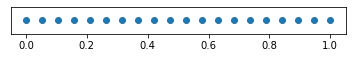

In [2]:
# Spatial resolution of mesh
N = 20

# Right limit of mesh
L = 1

# Generate 1D mesh
[nodes, elems, faces] = get_mesh_1D(N, [0,L], True);
elems = np.array(elems)[:-1,:]          # I believe there is one row too much in elems from get_mesh function

In [3]:
# Define some parameters, E, I, and q can also be lambda functions 

E = 1
I = 1

from AnalyticalSolutions import *

    
def get_both(q=0,q1=0,q2=0,q3=0,q4=0,QL=0,M0=0,ML=0,a=0,b=0,a0=0,aL=0,two_sided_support=False):
    
    if two_sided_support:
        
        bothends = BothEnds(a0, M0, aL, ML, 0, "constant", c=q, E=E, I=I, L=L)
        w_ana = bothends.get_solution()
        wp_ana = bothends.get_solution_prime()
        
        boundary_conditions = {'M0': M0, 'ML': ML, 'a0': a0, 'aL': aL}
        
        # assemble matrix and vectors
        S_ext = get_extended_S(nodes, elems, E, I, two_sided_support)
        rhs = get_extended_q_vector(nodes, elems, q, boundary_conditions, two_sided_support)

    else:
        
        cantilever = Cantilever(a, b, QL, ML, 0, "constant", E=E, I=I, c=q, L=L)
        w_ana = cantilever.get_solution()
        wp_ana = cantilever.get_solution_prime()
        
        boundary_conditions = {'QL': QL, 'ML': ML, 'a': a, 'b': b}
    
    
    ### get FEM solutions
            
    # assemble matrix and vectors
    S_ext = get_extended_S(nodes, elems, E, I, two_sided_support)
    rhs = get_extended_q_vector(nodes, elems, q, boundary_conditions, two_sided_support)

    # get FEM solution
    solution = spsolve(S_ext, rhs)
    w = solution[:-2]
    # extract w
    w_fem = w[::2]
    # extract w'
    wp_fem = w[1::2]
        

    return w_ana, wp_ana, w_fem, wp_fem

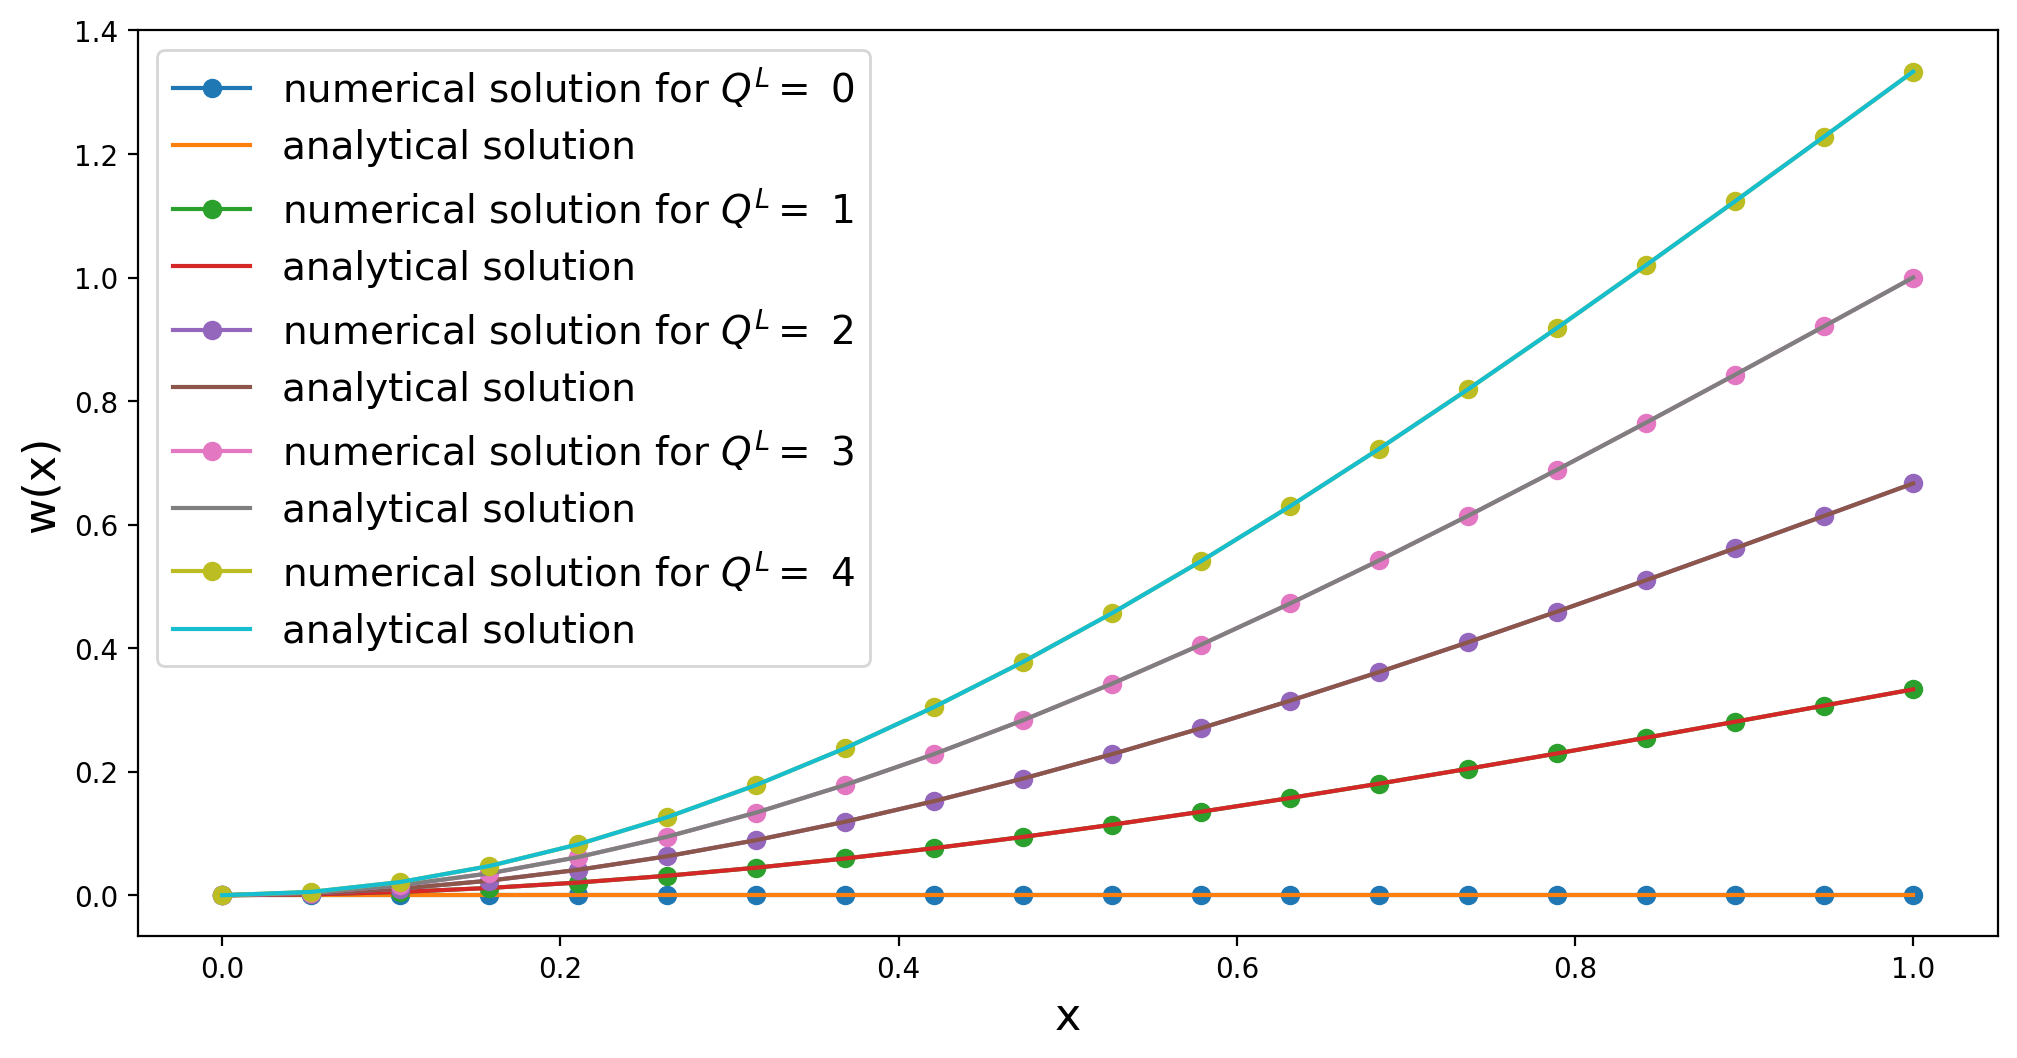

In [4]:
### PLOT w FOR q=0 AND DIFFERENT QL's (point loads)

import warnings
warnings.filterwarnings("ignore")

QLlist = range(5)
ML = 0
b = 0
a = 0

plt.figure(figsize=(12, 6), dpi=200)
for Q in QLlist:    
    
    w_ana, wp_ana, w_fem, wp_fem = get_both(QL=Q)
    plt.plot(nodes,w_fem,'o-',label=r'numerical solution for $Q^L=$ %i' % Q)
    plt.plot(nodes,w_ana(nodes),label='analytical solution')
    plt.legend(prop={'size': 14})
    plt.ylabel("w(x)",size=16)
    plt.xlabel("x",size=16)

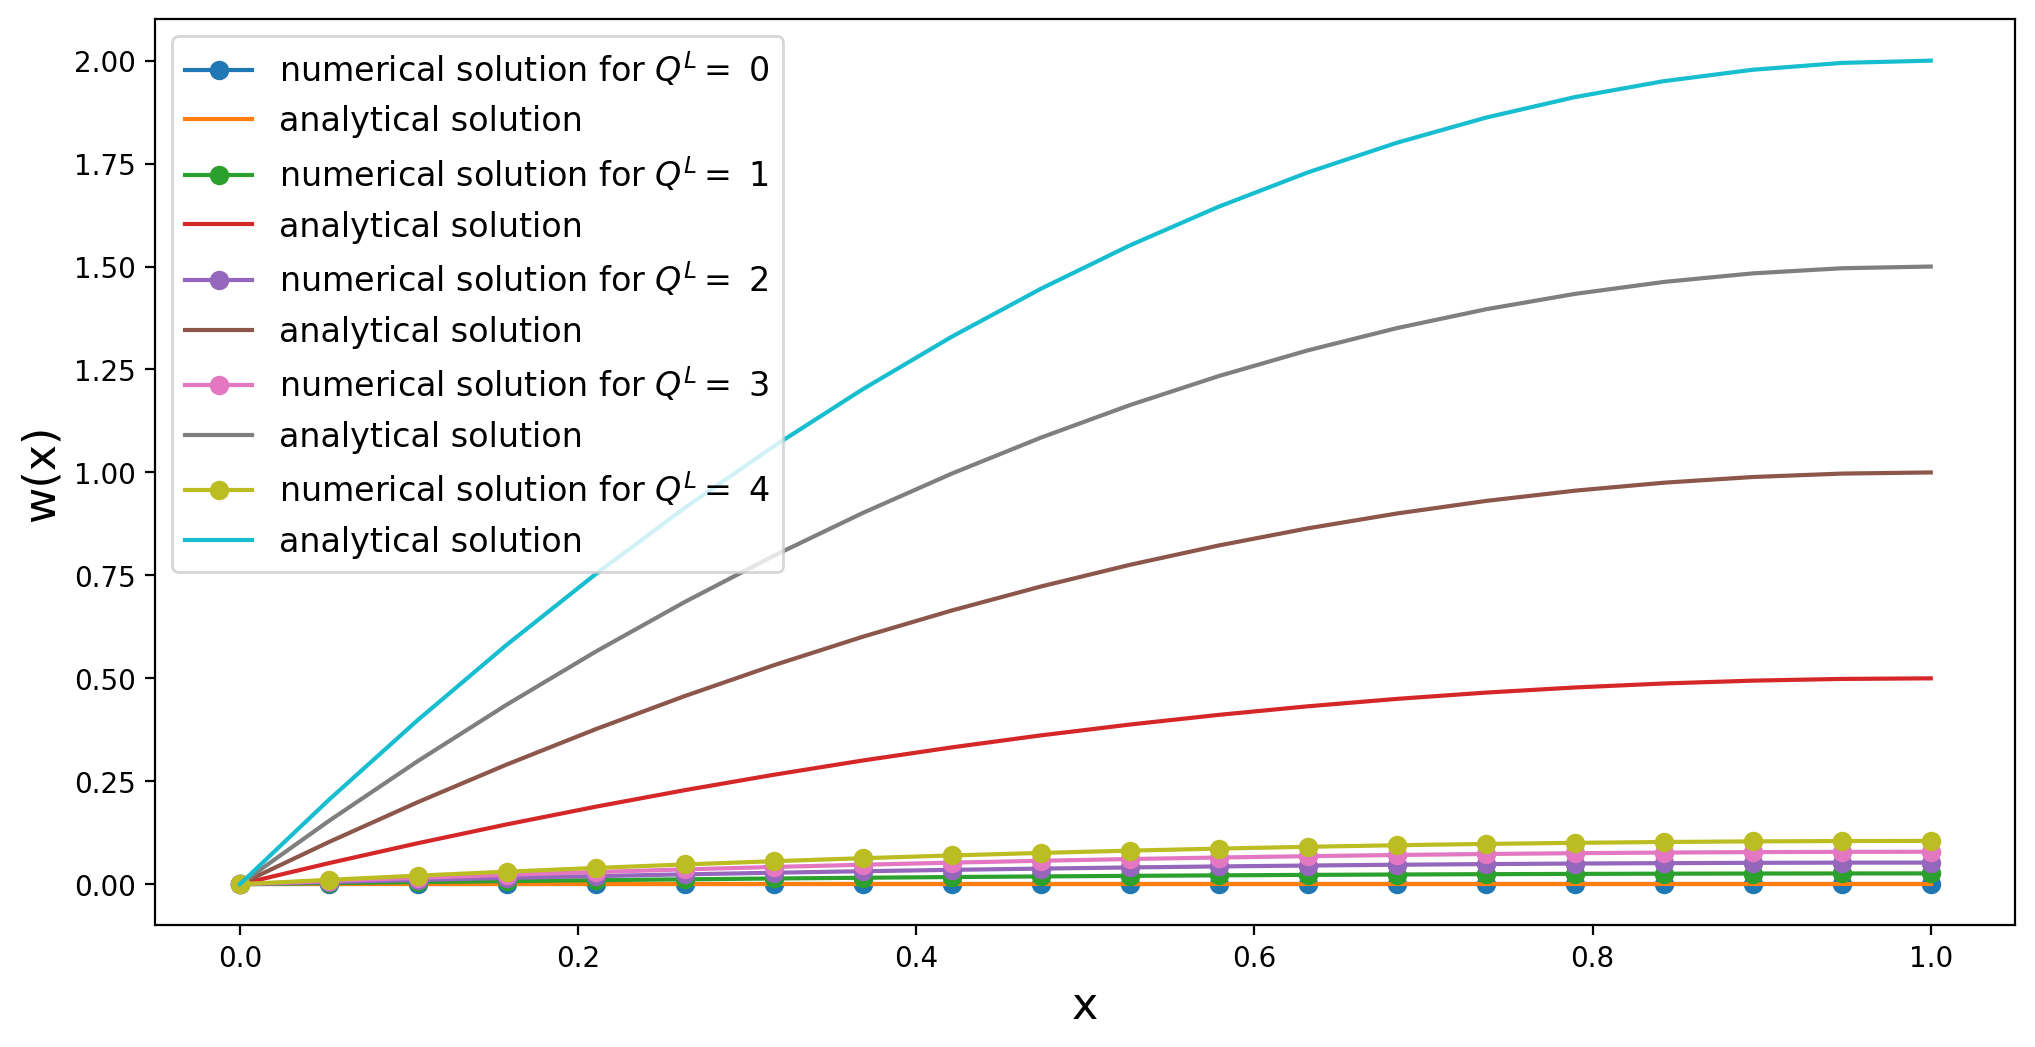

In [5]:
### PLOT w' FOR q=0 AND DIFFERENT QL's (point loads)

QLlist = range(5)
ML = 0
b = 0
a = 0

plt.figure(figsize=(12, 6), dpi=200)
for Q in QLlist:    
    
    w_ana, wp_ana, w_fem, wp_fem = get_both(QL=Q)
    plt.plot(nodes,wp_fem,'o-',label=r'numerical solution for $Q^L=$ %i' % Q)
    plt.plot(nodes,wp_ana(nodes), label='analytical solution')
    plt.legend(prop={'size': 12})
    plt.ylabel("w(x)",size=16)
    plt.xlabel("x",size=16)

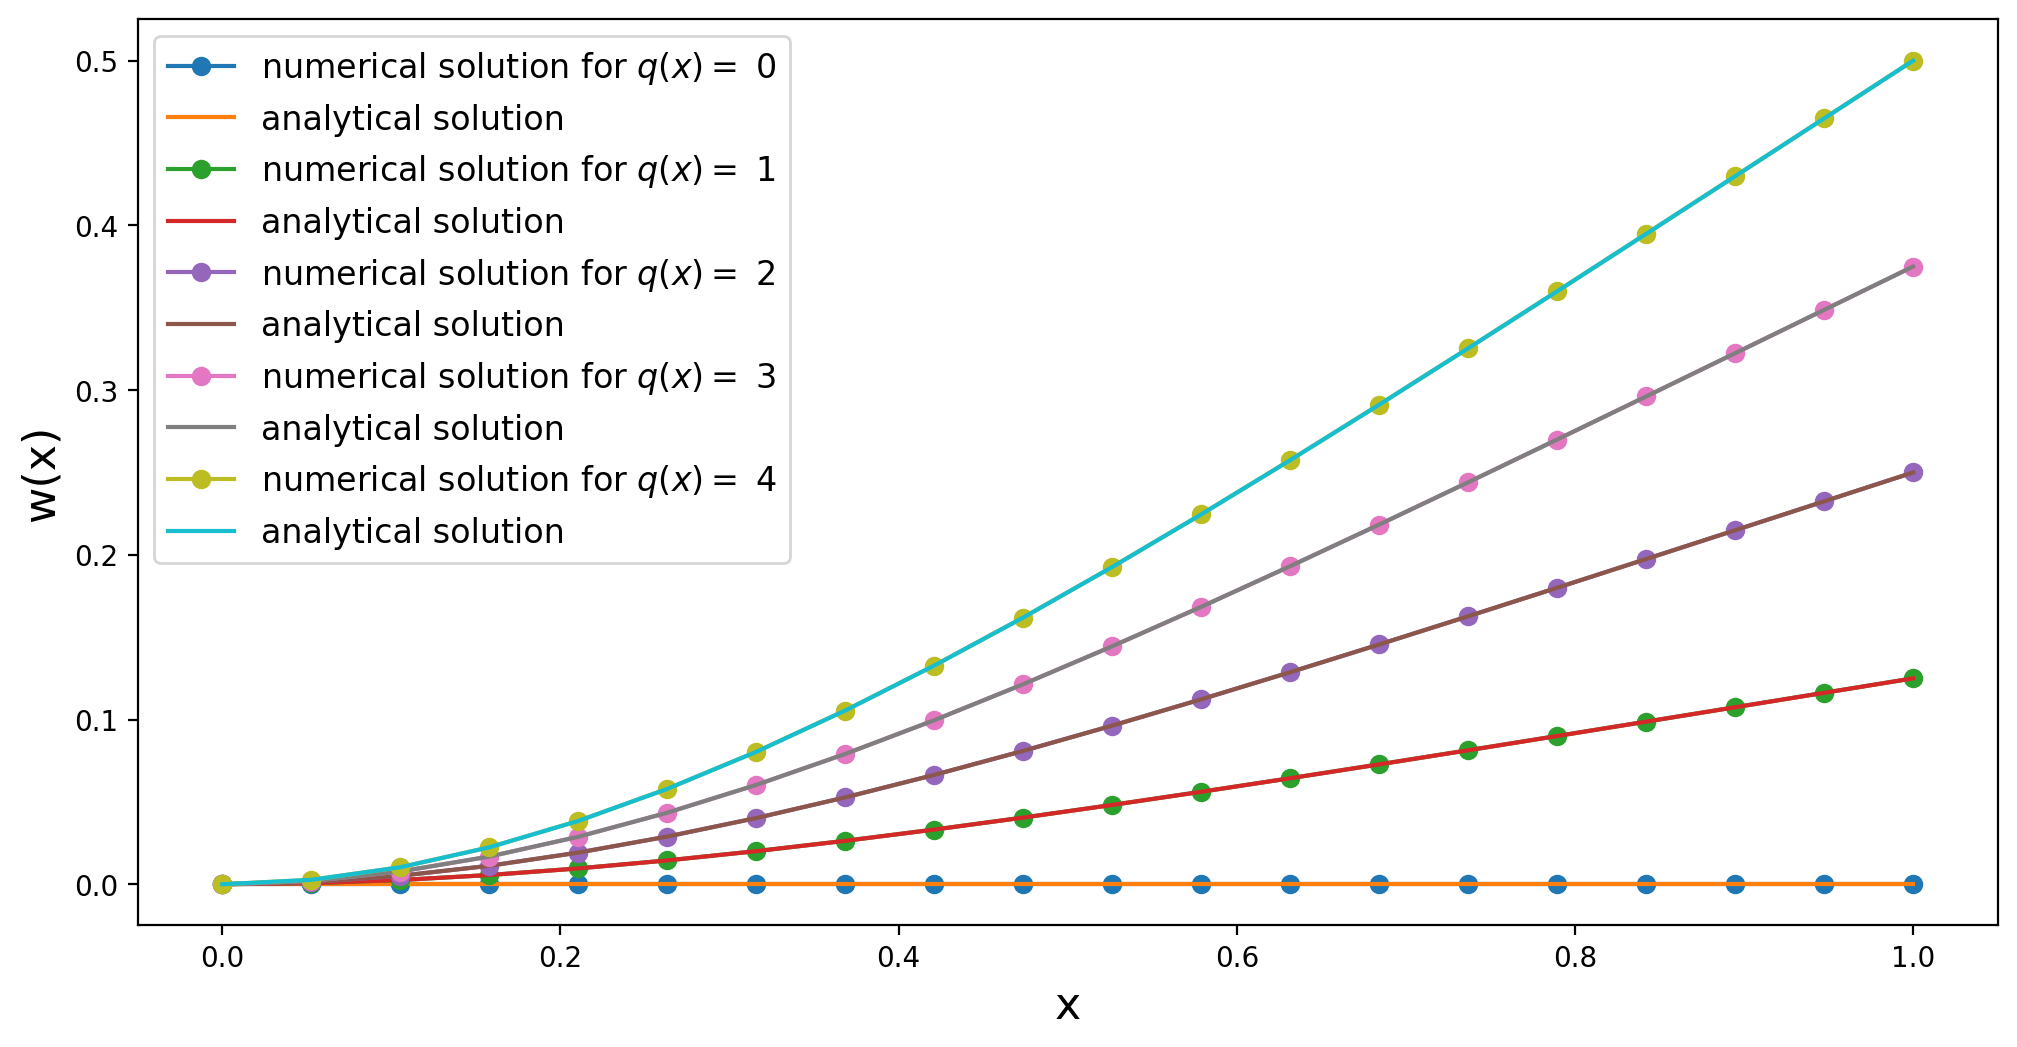

In [6]:
### PLOT w FOR DIFFERENT CONSTANT q's 

qlist = range(5)
ML = 0
b = 0
a = 0

plt.figure(figsize=(12, 6), dpi=200)
for q in qlist:    
    
    w_ana, wp_ana, w_fem, wp_fem = get_both(q,q1=lambda x: q*x, q2=lambda x: q*x**2/2, q3=lambda x: q*x**3/6, q4=lambda x: q*x**4/24)
    plt.plot(nodes,w_fem,'o-',label=r'numerical solution for $q(x)=$ %i' % q)
    plt.plot(nodes,w_ana(nodes),label='analytical solution')
    plt.legend(prop={'size': 12})
    plt.ylabel("w(x)",size=16)
    plt.xlabel("x",size=16)

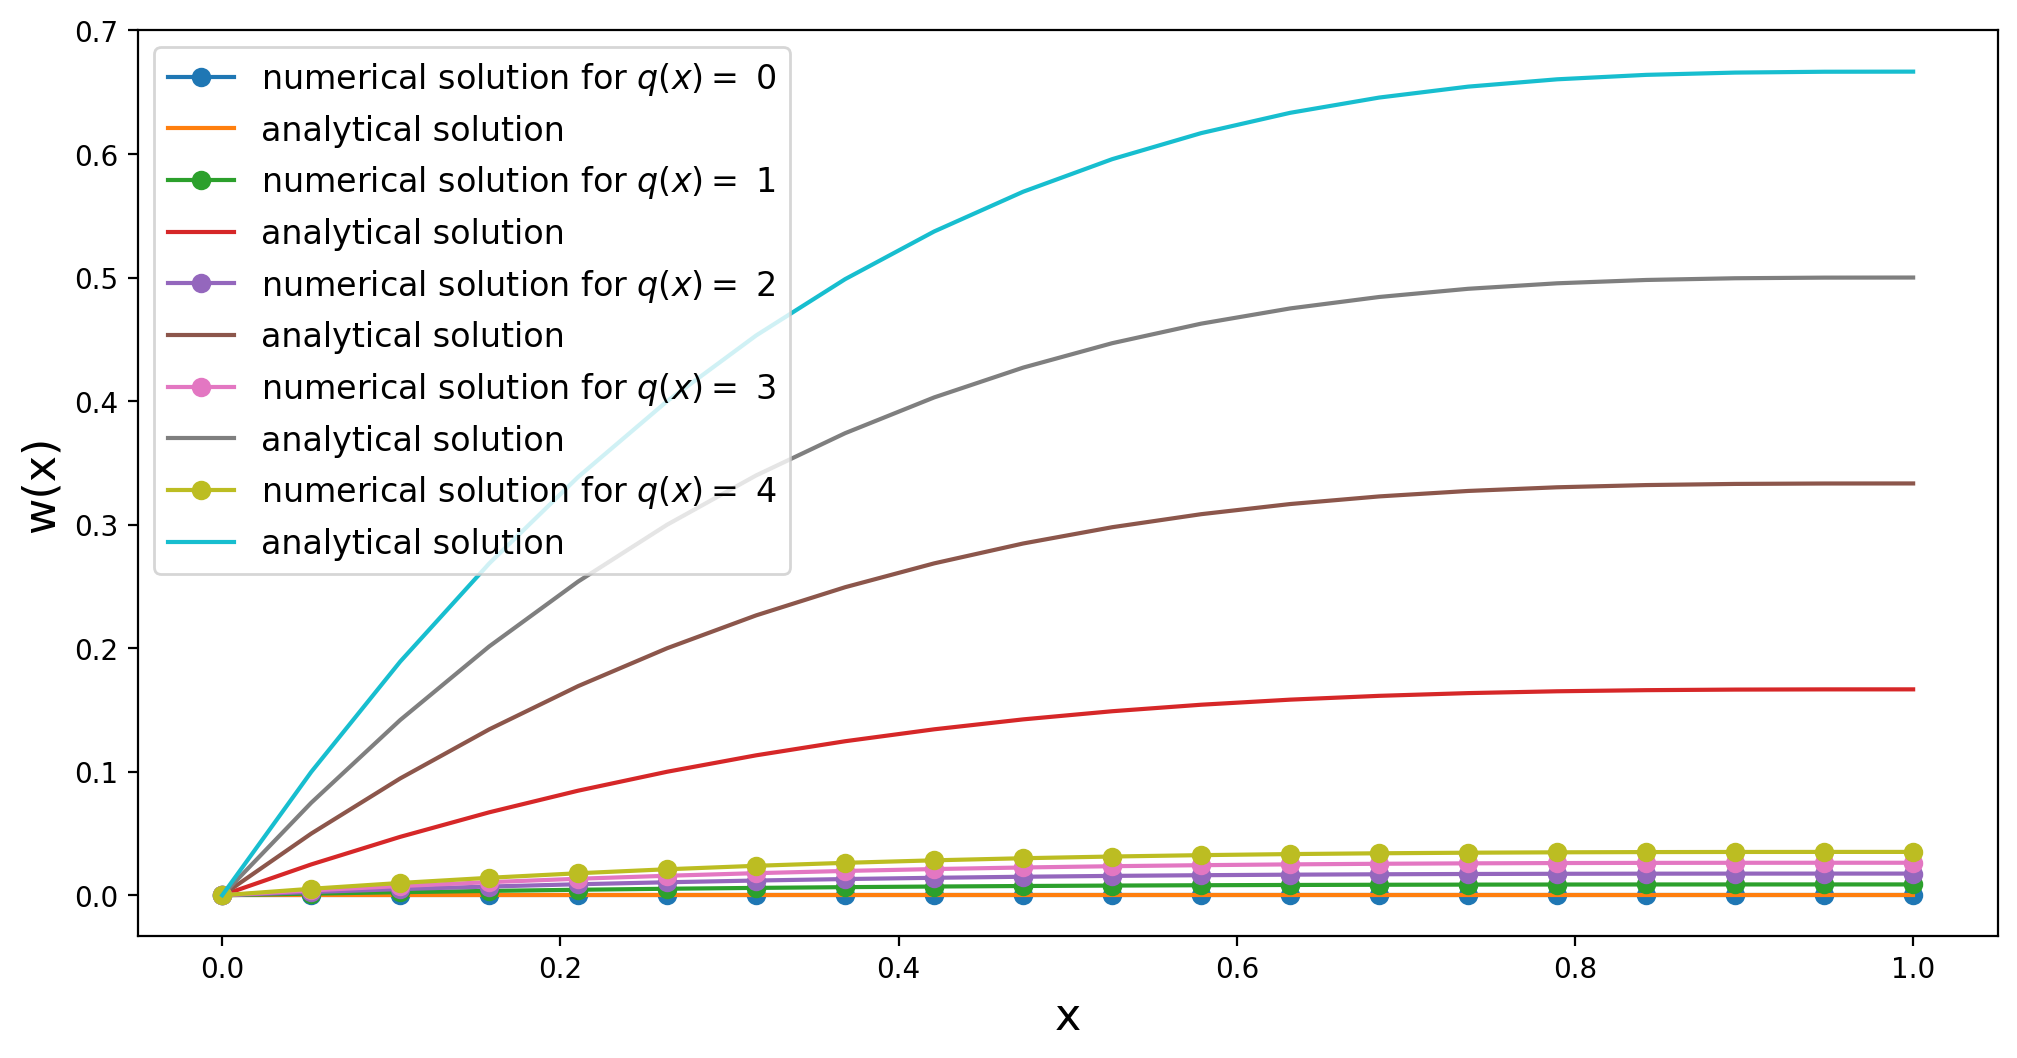

In [7]:
### PLOT w' FOR DIFFERENT CONSTANT q's 

qlist = range(5)
ML = 0
b = 0
a = 0

plt.figure(figsize=(12, 6), dpi=200)
for q in qlist:    
    
    w_ana, wp_ana, w_fem, wp_fem = get_both(q,q1=lambda x: q*x, q2=lambda x: q*x**2/2, q3=lambda x: q*x**3/6, q4=lambda x: q*x**4/24)
    plt.plot(nodes,wp_fem,'o-',label=r'numerical solution for $q(x)=$ %i' % q)
    plt.plot(nodes,wp_ana(nodes),label='analytical solution')
    plt.legend(prop={'size': 12})
    plt.ylabel("w(x)",size=16)
    plt.xlabel("x",size=16)

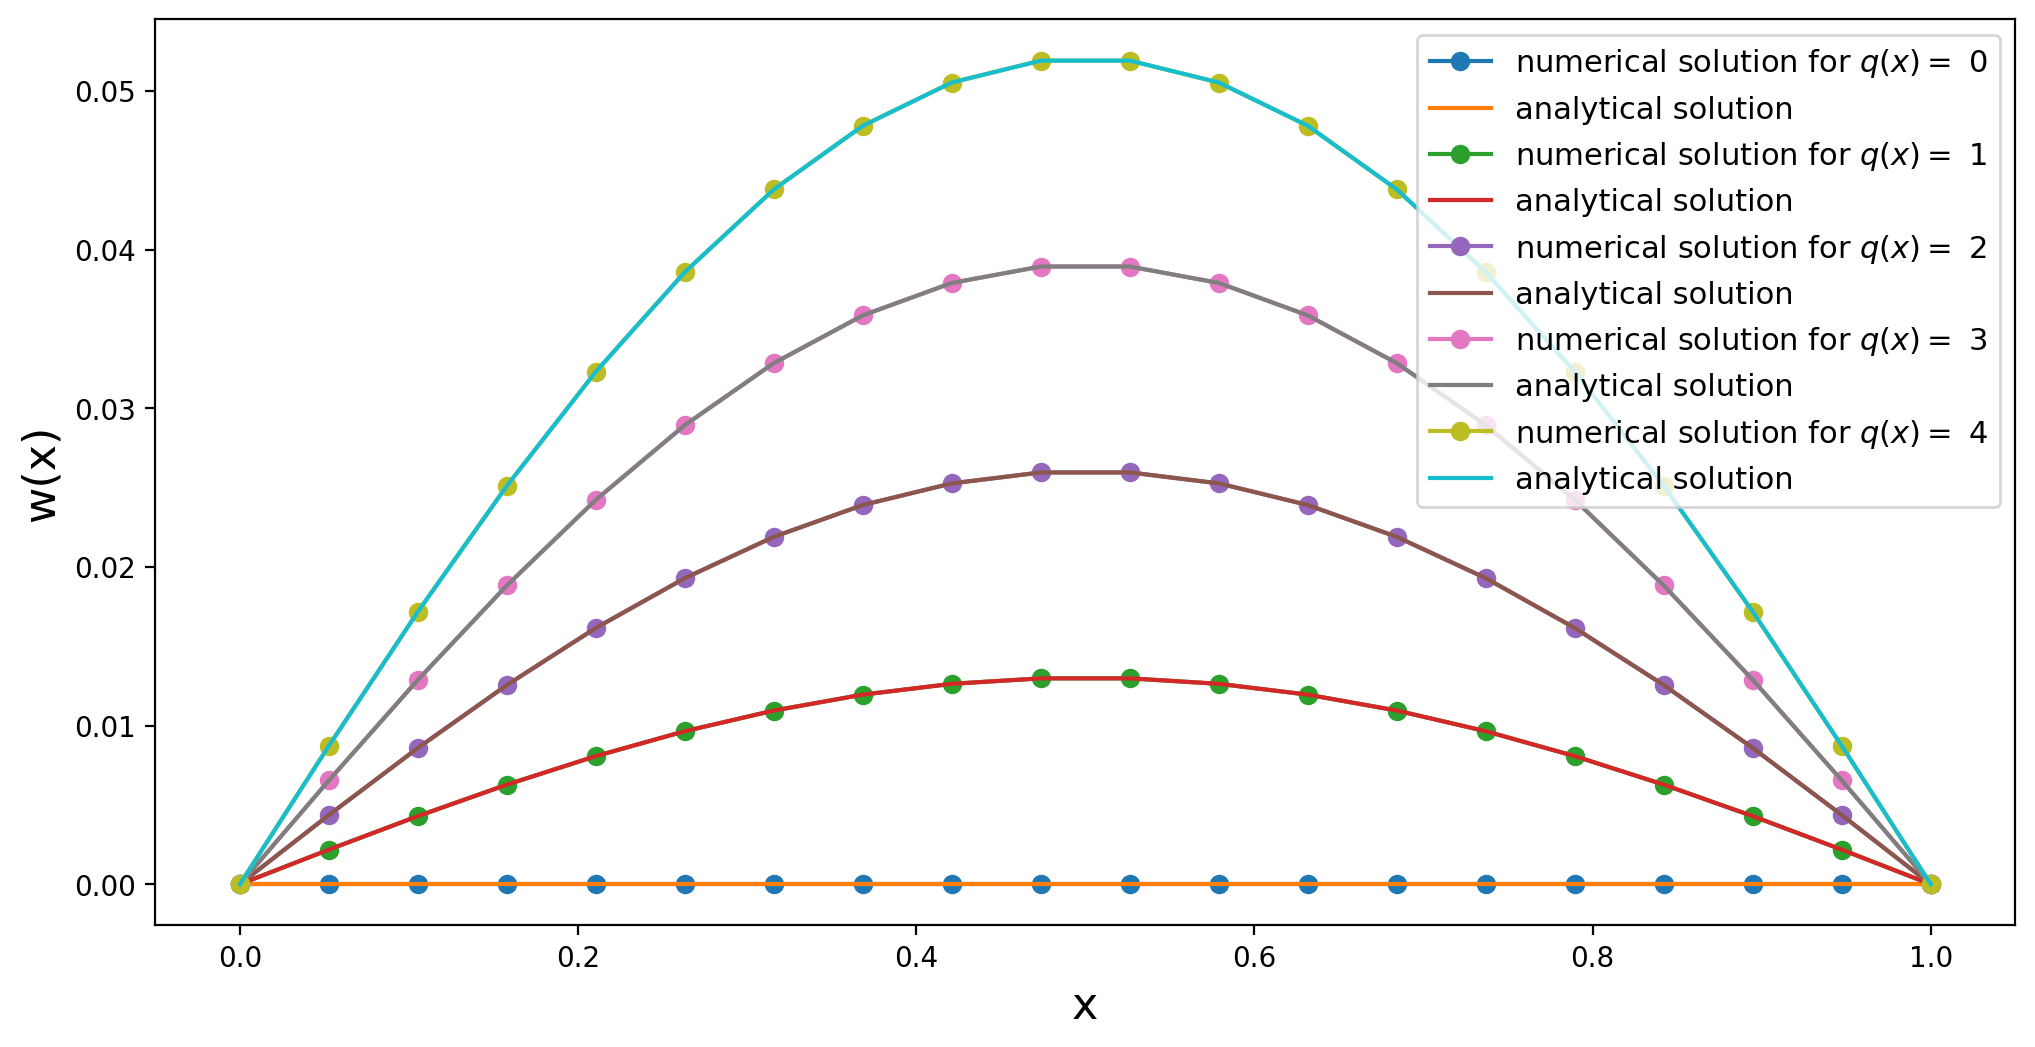

In [8]:
### PLOT w FOR DIFFERENT CONSTANT q's WITH SUPPORT AT BOTH ENDS

qlist = range(5)
ML = 0
M0 = 0
a0 = 0
aL = 0

plt.figure(figsize=(12, 6), dpi=200)
for q in qlist:    
    
    w_ana, wp_ana, w_fem, wp_fem = get_both(q, q1=lambda x: q*x, q2=lambda x: q*x**2/2, q3=lambda x: q*x**3/6, q4=lambda x: q*x**4/24, M0=M0, ML=ML, a0=a0, aL=aL, two_sided_support=True)
    plt.plot(nodes,w_fem,'o-',label=r'numerical solution for $q(x)=$ %i' % q)
    plt.plot(nodes,w_ana(nodes),label='analytical solution')
    plt.legend(prop={'size': 11})
    plt.ylabel("w(x)",size=16)
    plt.xlabel("x",size=16)

In [9]:
xx = np.linspace(0,L,100)

q = lambda x: x

def f(a, b, QL, ML, x0, Load, LoadConstant):
    
    ex = Cantilever(a,b,QL,ML,x0,Load, L=L, c=LoadConstant, q=lambda x:x)
    ex.c = LoadConstant
    sol =  ex.get_solution_list(xx)
    plt.plot(xx, sol)

interact(f, a=(-20.0,20.0), b=(-5.0,5.0), QL=(-2.0,2.0), ML=(-2.0,2.0), x0=(0.0, 5.0), Load=["constant", "delta", "arbitrary function"], LoadConstant = (-15.0,15.0))
plt.show()

interactive(children=(FloatSlider(value=0.0, description='a', max=20.0, min=-20.0), FloatSlider(value=0.0, des…

In [10]:
from AnalyticalSolutions import BothEnds

q = lambda x: x

L = 2

def g(A1, B1, A2, B2, x0, Load, LoadConstant):
    
    xx = np.linspace(0,L,100)
    
    ex = BothEnds(A1,B1,A2,B2,x0, Load, L=L, c=LoadConstant, q=q)
    sol =  ex.get_solution_list(xx)
    plt.plot(xx, sol)

interact(g, A1=(-20.0,20.0), B1=(-20.0,20.0), A2=(-20.0,20.0), B2=(-20.0,20.0), x0=(0.0, 5.0), Load=["constant", "delta", "arbitrary function"], LoadConstant = (-15.0,15.0))
plt.show()

interactive(children=(FloatSlider(value=0.0, description='A1', max=20.0, min=-20.0), FloatSlider(value=0.0, de…